In [1]:
# 导入专利可视化程序包及相关程序包
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
from datetime import datetime
# 设置中文显示字体
plt.rcParams['font.sans-serif'] = ['SimHei']       # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示正负号

# 专利态势分析
所谓专利态势分析，即对某一行业或技术领域的专利总体状况进行分析，通常是针对专利数量进行统计分析。基本的专利数量统计分析包括：

* 申请趋势分析

* 技术构成分析

* 地域分布分析

* 申请人排名分析

## 申请趋势分析
申请趋势分析常见的分析对象：

* 申请量

* 授权量

* 有效量

* 发明人数量

* 申请人数量
  
申请趋势分析常用图表：

* 折线图

* 面积图

* 柱形图
  
其中，折线图和面积图侧重表示较长时间段内的数量变化趋势，而柱形图侧重表示在短时间段内的数量变化情况，并突出每一个时间段的具体数量值。

### 折线图 —— 长时间段内的申请趋势变化
#### 标准折线图

标准折线图在专利分析中常用来表示某一对象（如国家、地区、申请人、技术领域等）的专利申请量、授权量、有效量、发明人数量、申请人数量等随时间的变化情况

In [2]:
data_211 = pd.read_csv('data/Fig2-1-1.csv', 
                       header=None,
                       parse_dates=[0]).rename(columns={0:'年份', 1: '申请量'})

In [3]:
data_211.head()

,年份,申请量
0,1964-01-01,1
1,1966-01-01,4
2,1967-01-01,22
3,1969-01-01,17
4,1970-01-01,69


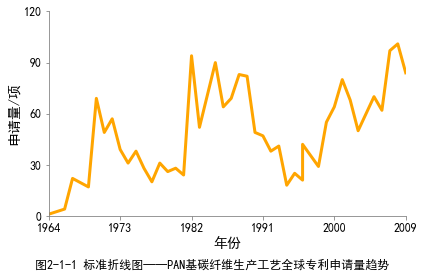

In [4]:
years_ticks = [1964, 1973, 1982, 1991, 2000, 2009]
amount_ticks = [0, 30, 60, 90, 120]

fig, ax = plt.subplots(tight_layout=True)
ax.plot(data_211['年份'], data_211['申请量'],
        color='orange', lw=3)

ax.set_xlabel('年份', fontsize=14)
ax.set_ylabel('申请量/项', fontsize=14)
ax.set_xticks([datetime(year,1,1) for year in years_ticks], 
              [str(year) for year in years_ticks])
ax.set_yticks(amount_ticks)
ax.set_xlim([datetime(1964,1,1), datetime(2009,1,1)])
ax.set_ylim([0, 120])
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('grey')
ax.tick_params(color='grey', labelsize=12)

fig.supxlabel('图2-1-1 标准折线图——PAN基碳纤维生产工艺全球专利申请量趋势', fontsize=12, y=0.05);


在标准折线图中，我们可以加入产业和技术信息，这样能够丰富折线图表达的内容，有助于理解该领域或申请人申请量变化的原因，便于得出可靠的结论。

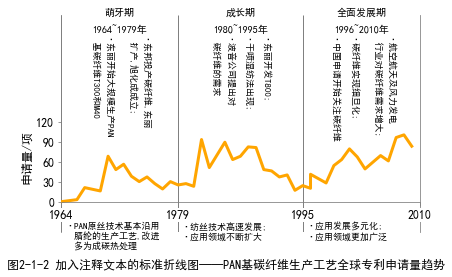

In [5]:
years_ticks = [1964, 1979, 1995, 2010]
amount_ticks = [0, 30, 60, 90, 120]
xlim = [datetime(1964,1,1), datetime(2010,1,1)]
ylim = [-45, 280]

fig, ax = plt.subplots(tight_layout=True)
ax.plot(data_211['年份'], data_211['申请量'],
        color='orange', lw=3)

ax.set_ylabel('申请量/项', fontsize=12, y=0.35)
ax.set_xticks([datetime(year,1,1) for year in years_ticks], 
              [str(year) for year in years_ticks])
ax.set_yticks(amount_ticks)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.spines['top'].set_visible(False)
ax.spines[['left', 'bottom', 'right']].set_color('grey')
ax.spines[['left', 'right']].set_zorder(1)      # 调整zorder以便突出刻度标签显示
ax.tick_params(color='grey', labelsize=12)

ax.spines['bottom'].set_position(('data', 0))
for label in ax.get_xticklabels():
    label.set_bbox(dict(fc='w', ec='w', pad=1)) # 设置刻度标签背景色以避免vlines对数字的干扰

ax.vlines([datetime(year,1,1) for year in years_ticks], *ylim, colors='grey',
          lw=1, zorder=1)       # 调整zorder以便突出刻度标签显示

annotate = [{'stage': '萌牙期',
        'period': '1964~1979年', 
        'event': ['·东邦投产碳纤维,东丽\n 扩产,旭化成成立;\n\n\n', 
                '·东丽开始大规模生产PAN\n 基碳纤维T300和M40'], 
        'effect': ['·PAN原丝技术基本沿用\n  腈纶的生产工艺,改进\n  多为成碳热处理']},
            {'stage': '成长期',
        'period': '1980~1995年',
        'event': ['·东丽开发T800;\n\n', 
                '·干喷湿纺法出现;\n\n', 
                '·波音公司提出对\n 碳纤维的需求'],
        'effect': ['·纺丝技术高速发展;\n', 
                '·应用领域不断扩大']},
            {'stage': '全面发展期',
        'period': '1996~2010年',
        'event': ['·航空航天及风力发电\n 行业对碳纤维需求增大;\n\n\n', 
                '·碳纤维实现细旦化;\n\n', 
                '·中国申请开始关注碳纤维'],
        'effect': ['·应用发展多元化;\n', 
                '·应用领域更加广泛']}]
ticks_x = [ax.transAxes.inverted().transform(ax.transData.transform((year,0))) 
           for year in ax.get_xticks()]
pos_x = [(a[0] + b[0]) / 2 for a, b in zip(ticks_x, ticks_x[1:])]
for i, v in enumerate(annotate):
    ax.text(pos_x[i], 1, annotate[i]['stage'], transform=ax.transAxes, ha='center')
    ax.text(pos_x[i], 0.92, annotate[i]['period'], transform=ax.transAxes, ha='center')
    ax.text(pos_x[i], 0.9, ''.join(annotate[i]['event']), transform=ax.transAxes, 
            ha='center', va='top', rotation=-90, multialignment='left', fontsize=9)
    ax.text(ticks_x[i][0]+0.01, 0.05, ''.join(annotate[i]['effect']), transform=ax.transAxes,
            multialignment='left', va='top', fontsize=9)

fig.supxlabel('图2-1-2 加入注释文本的标准折线图——PAN基碳纤维生产工艺全球专利申请量趋势', fontsize=12, y=0.05);
#fig.savefig('图2-1-2.png', dpi=300)

In [6]:
data_213 = pd.read_csv('data/Fig2-1-3.csv', 
                       header=None,
                       parse_dates=[0]).rename(columns={0:'年份', 1: '申请量'})
data_213.head()

,年份,申请量
0,2001-01-01,4
1,2002-01-01,4
2,2003-01-01,5
3,2004-01-01,19
4,2005-01-01,81


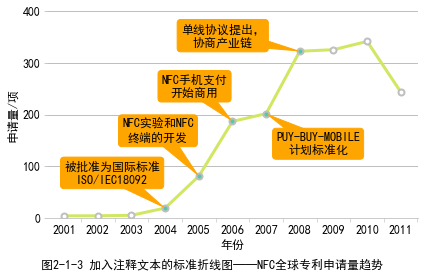

In [7]:
ylim = [0, 400]
amount_ticks = range(0, 401, 100)

fig, ax = plt.subplots(tight_layout=True)
ax.plot(data_213['年份'], data_213['申请量'], color='#D0E762', lw=3)
for row in data_213.index:
    color = '#52CAA9' if (row > 2 and row < 8) else 'white'
    ax.plot(data_213.loc[row, '年份'], data_213.loc[row, '申请量'], 'o',
            markeredgecolor='#BFBFBF', markeredgewidth=2, markersize=6, 
            markerfacecolor=color)

ax.set_ylabel('申请量/项', fontsize=12)
ax.set_xlabel('年份', fontsize=12)

ax.set_ylim(ylim)
ax.set_yticks(amount_ticks)
ax.set_xticks(data_213['年份'])
# 将X轴刻度标签移至主刻度线中间，参考https://matplotlib.org/stable/gallery/ticks/centered_ticklabels.html
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))  
ax.tick_params(axis='x', bottom=False)   # 隐藏主刻度
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=6)) # 显示辅刻度
ax.tick_params(axis='x', which='minor', length=4, color='#BFBFBF')

ax.spines[['left', 'top', 'right']].set_visible(False)
ax.grid(True, axis='y')
ax.spines['bottom'].set_color('#BFBFBF')
ax.tick_params(color='#BFBFBF', labelsize=12)

txt = ['被批准为国际标准\nISO/IEC18092',
        'NFC实验和NFC\n终端的开发',
        'NFC手机支付\n开始商用',
        'PUY-BUY-MOBILE\n计划标准化',
        '单线协议提出，\n协商产业链',]
# 绘制对话框气泡注释
def dlg_bubble(txt, axes, *, xy, xytext, ha, tail_width, fontsize):
    rect = mpatches.Rectangle((0,0), 1, 1)
    ann = axes.annotate(txt, xy=xy, fontsize=fontsize, xytext=xytext, 
                  textcoords='offset points', ha=ha, multialignment='center',
                  bbox=dict(boxstyle='round', fc='orange', ec='orange'),
                  arrowprops=dict(arrowstyle=f'wedge,tail_width={tail_width}', 
                                  fc='orange', ec='orange', shrinkA=0, patchA=rect))

dlg_bubble(txt[0], ax, xy=(data_213.iloc[3,0], data_213.iloc[3,1]), 
           xytext=(-5,25), ha='right', tail_width=1.5, fontsize=12)
dlg_bubble(txt[1], ax, xy=(data_213.iloc[4,0], data_213.iloc[4,1]),
           xytext=(-5,35), ha='right', tail_width=1.5, fontsize=12)
dlg_bubble(txt[2], ax, xy=(data_213.iloc[5,0], data_213.iloc[5,1]),
           xytext=(-5,25), ha='right', tail_width=1.5, fontsize=12)
dlg_bubble(txt[3], ax, xy=(data_213.iloc[6,0], data_213.iloc[6,1]),
           xytext=(10,-40), ha='left', tail_width=1.5, fontsize=12)
dlg_bubble(txt[4], ax, xy=(data_213.iloc[7,0], data_213.iloc[7,1]),
           xytext=(-35,5), ha='right', tail_width=1.5, fontsize=12)

fig.supxlabel('图2-1-3 加入注释文本的标准折线图——NFC全球专利申请量趋势', fontsize=12, y=0.05);

#### 多重折线图

在专利分析中，多重折线图可用来表示多个国家或地区或技术领域或者多个申请人的申请量、授权量、有效量随年份的变化趋势。

使用多重折线图时，各数据系列可以是同一量纲的数据系列，也可以是不同量纲的数据系列。


如果比较的多个数据系列均属于相同类别，如都属于申请量、授权量、有效量等，则可以使用**同一量纲**的数据系列多重折线图

In [8]:
data_214 = pd.read_csv('data/Fig2-1-4.csv', 
                       header=None,
                       parse_dates=[0]).rename(columns={0:'年份', 
                                                        1: '杜邦',
                                                        2: '帝人'})
data_214.head()                                                    

,年份,杜邦,帝人
0,1958-01-01,3,NaN
1,1959-01-01,1,NaN
2,1960-01-01,2,NaN
3,1961-01-01,3,NaN
4,1962-01-01,2,NaN


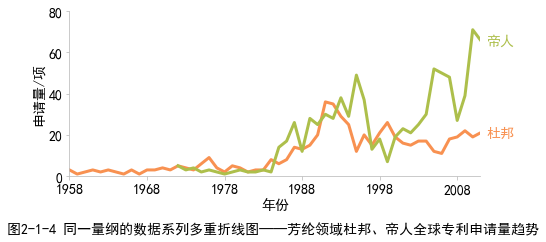

In [9]:
data_214_NoNA = data_214.dropna()
ylim = [0, 80]
yticks = range(0, 81, 20)
xlim = [data_214.iloc[0, 0], data_214.iloc[-1,0]]
xticks = [data_214.iloc[i, 0] for i in range(0, len(data_214), 10)]

fig, ax = plt.subplots(figsize=(7,3.5), tight_layout=True)
ax.plot(data_214['年份'], data_214['杜邦'], lw=3, c='#F89151')
ax.plot(data_214_NoNA['年份'], data_214_NoNA['帝人'], lw=3, c='#ADBF4B')

ax.set_xlabel('年份', fontsize=14)
ax.set_ylabel('申请量/项', fontsize=14)

ax.set_ylim(ylim)
ax.set_yticks(yticks)
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))   # 设置X轴时间显示方式
ax.tick_params(color='#BFBFBF', labelsize=14)

ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#BFBFBF')

# 在曲线末尾添加图例标签, 参考https://stackoverflow.com/questions/49237522/how-to-annotate-end-of-lines-using-python-and-matplotlib
for line, name in zip(ax.lines, data_214.columns[1:]):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1, y), xytext=(6, 0), color=line.get_color(),
                xycoords=ax.get_yaxis_transform(), textcoords='offset points',
                size=14, va='center')

fig.supxlabel('图2-1-4 同一量纲的数据系列多重折线图——芳纶领域杜邦、帝人全球专利申请量趋势', 
            fontsize=14, y=0.05);

如果比较的多个数据系列属于两个不同类型，比如专利申请量与其他变量（如市场份额、公司业绩等），可以设置让其中一个数据系列演次坐标轴采用不同量纲来绘制多重折线图

In [10]:
data_215 = pd.read_csv('data/Fig2-1-5.csv', header=None,
                        parse_dates=[0]).rename(columns={0:'年份',
                                                         1:'当期利润',
                                                         2:'申请量'})
data_215.head()                                                     

,年份,当期利润,申请量
0,1990-01-01,395,130.0
1,1991-01-01,325,204.0
2,1992-01-01,254,260.0
3,1993-01-01,276,241.0
4,1994-01-01,391,376.0


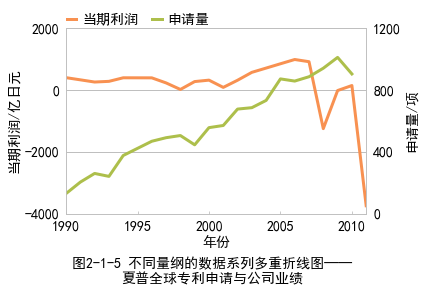

In [11]:
xlim = data_215.iloc[[0,-1],0]
ylim = [-4000, 2000]
yticks = [-4000, -2000, 0, 2000]
xticks = [datetime(y, 1, 1) for y in [1990,1995,2000,2005,2010]]
fig, ax = plt.subplots(tight_layout=True)
ax.plot(data_215['年份'], data_215['当期利润'], lw=3, c='#F89151', 
        label=data_215.columns[1])
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.set_ylim(ylim)
ax.set_yticks(yticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))   # 设置X轴时间显示方式
ax.tick_params(color='#BFBFBF', labelsize=14, direction='in', pad=7)
ax.spines[['left', 'top', 'bottom', 'right']].set_color('#BFBFBF')
ax.grid(True, axis='y')
ax.set_ylabel('当期利润/亿日元', fontsize=14)
ax.set_xlabel('年份', fontsize=14)

ylim=[0,1200]
yticks = range(0,1201, 400)
pax = ax.twinx()
pax.plot(data_215['年份'], data_215['申请量'], lw=3, c='#ADBF4B',
        label=data_215.columns[2])
pax.set_ylim(ylim)
pax.set_yticks(yticks)
pax.tick_params(color='#BFBFBF', labelsize=14)
pax.set_ylabel('申请量/项', fontsize=14)
pax.spines[['left', 'top', 'bottom', 'right']].set_color('#BFBFBF')
pax.tick_params(direction='in', pad=7)

fig.legend(loc='upper left', ncol=2, frameon=False, fontsize=14,
        bbox_to_anchor=(-0.04, 1.15), bbox_transform=ax.transAxes, # 调整图例的位置
        columnspacing=1, handlelength=0.7, handletextpad=0.4)   # 调整图例大小和间距等

fig.supxlabel('图2-1-5 不同量纲的数据系列多重折线图——\n夏普全球专利申请与公司业绩', 
            fontsize=14, y=0.05);

### 面积图 —— 长时间段内的申请数量累积

面积图由于在折线下方的区域中填充了颜色，因此不仅能反映出数据的变化趋势，还能利用折线与坐标轴围成的图形来表现数据的累积值。

#### 标准面积图

In [12]:
data_216 = pd.read_csv('data/Fig2-1-6.csv', header=None,
                       parse_dates=[0]).rename(columns={0:'年份',
                                                        1:'申请量'})
data_216.head()                                                    

,年份,申请量
0,1994-01-01,1
1,1995-01-01,7
2,1996-01-01,0
3,1997-01-01,1
4,1998-01-01,0


Text(0.5, 0.05, '图2-1-6 标准面积图——XX领域中国市场专利申请量趋势')

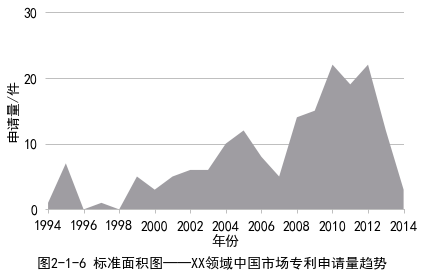

In [13]:
fontsize = 14
ylim = [0, 30]
xlim = data_216.iloc[[0,-1],0]
yticks = range(0, 31, 10)
xticks = data_216.iloc[range(0, len(data_216), 2), 0]

fig, ax = plt.subplots(tight_layout=True)
ax.fill_between(data_216['年份'], data_216['申请量'], fc='#9F9DA2')

ax.set_ylabel('申请量/件', fontsize=fontsize)
ax.set_xlabel('年份', fontsize=fontsize)

ax.grid(True, axis='y')
color = ax.get_ygridlines()[0].get_color()

ax.spines[['top', 'right', 'left']].set_visible(False)
ax.spines['bottom'].set_color(color)
ax.tick_params(color=color, labelsize=fontsize, pad=7)

ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set_yticks(yticks)
ax.set_xticks(xticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))   # 设置X轴时间显示方式
ax.get_yaxis().set_zorder(0.5)  # 使网格线在面积图下层, 默认情况下网格线在面积图上层

fig.supxlabel('图2-1-6 标准面积图——XX领域中国市场专利申请量趋势', fontsize=14, y=0.05)

对于上图，我们也可以将面积图的边粗化或采用不同颜色，商业报刊经常使用这种风格。

Text(0.5, 0.05, '图2-1-7 粗边面积图——XX领域中国市场专利申请量趋势')

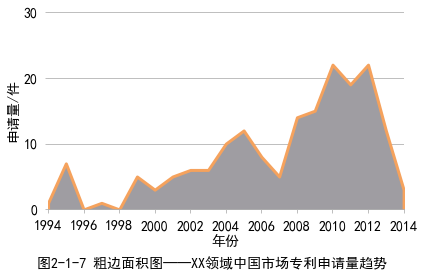

In [14]:
fontsize = 14
ylim = [0, 30]
xlim = data_216.iloc[[0,-1],0]
yticks = range(0, 31, 10)
xticks = data_216.iloc[range(0, len(data_216), 2), 0]

fig, ax = plt.subplots(tight_layout=True)
ax.fill_between(data_216['年份'], data_216['申请量'], -1, fc='#9F9DA2', # y2设置成-1，使得下方的粗边不可见
                ec='#F5A25D', lw=3)  # 设置粗边及颜色

ax.set_ylabel('申请量/件', fontsize=fontsize)
ax.set_xlabel('年份', fontsize=fontsize)

ax.grid(True, axis='y')
color = ax.get_ygridlines()[0].get_color()

ax.spines[['top', 'right', 'left']].set_visible(False)
ax.spines['bottom'].set_color(color)
ax.tick_params(color=color, labelsize=fontsize, pad=7)

ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set_yticks(yticks)
ax.set_xticks(xticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))   # 设置X轴时间显示方式
ax.get_yaxis().set_zorder(0.5)  # 使网格线在面积图下层

fig.supxlabel('图2-1-7 粗边面积图——XX领域中国市场专利申请量趋势', fontsize=14, y=0.05)

#### 分段面积图
对面积图进行分段可以很直观的表现出指标数据（如专利申请量、授权量、有效量、申请人数量、发明人数量及其他数据指标）在不同阶段的变化趋势。

In [15]:
data_219 = pd.read_csv('data/Fig2-1-9.csv', header=None,
                        parse_dates=[0]).rename(columns={0:'年份', 1:'申请量'})
data_219.head()                        

,年份,申请量
0,1988-01-01,1
1,1989-01-01,1
2,1990-01-01,2
3,1991-01-01,2
4,1992-01-01,14


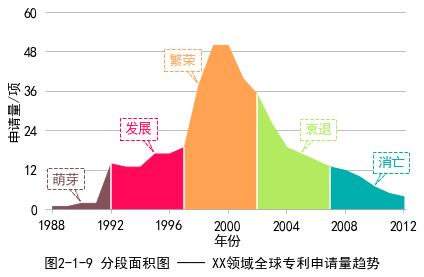

In [16]:
ylim = [0, 60]
xlim = [datetime(1987,10,1), datetime(2012, 3, 1)]
yticks = range(0, 61, 12)
xticks = [datetime(year, 1, 1) for year in range(1988, 2013, 4)]
txt = ['萌芽', '发展', '繁荣', '衰退', '消亡']

x_sections = [1992, 1997, 2002, 2007]
color_sections = ['#825159', '#FF0958', '#FFA252', '#B2EB60', '#00AEAE']
# 将数据按照不同时间段进行分割
sections = []
data_219_year = data_219['年份']
for i, year in enumerate(x_sections):
    if (i == 0):
        sections.append(data_219[data_219_year<=datetime(year, 1, 1)])
    else:
        sections.append(data_219[(data_219_year<=datetime(year, 1, 1)) & 
                                 (data_219_year>=datetime(x_sections[i-1], 1, 1))])
sections.append(data_219[data_219_year>=datetime(year, 1, 1)])                                 


fig, ax = plt.subplots(tight_layout=True)
for i, data in enumerate(sections):
    ax.fill_between(data['年份'], data['申请量'], color=color_sections[i])
    # 分段数据间加白边以明显区分
    if (i > 0):
        ax.vlines(data.iloc[0,0], 0, data.iloc[0, 1], color='w')
    # 添加相应的对话气泡数据标注
    mid = len(data) // 2
    offset_x = -30 if i < len(sections) // 2 + 1 else 3
    mid = mid if i != 2 else mid - 2
    ax.annotate(txt[i], xy=(data.iloc[mid, 0], data.iloc[mid, 1]), fontsize=14,
                xytext=(offset_x, 20), textcoords='offset points', color=color_sections[i],
                bbox=dict(boxstyle='square', fc='w', ec=color_sections[i], linestyle='--'),
                arrowprops=dict(arrowstyle='wedge,tail_width=0.6', fc='w', ec=color_sections[i],
                                linestyle='--', shrinkA=0, patchA=mpatches.Rectangle((0,0), 1, 1)))

ax.set_ylim(ylim)
ax.set_xlim(xlim)

grid = ax.grid(True, axis='y')
color = ax.get_ygridlines()[0].get_color()

ax.set_xlabel('年份', fontsize=14)
ax.set_ylabel('申请量/项', fontsize=14)

ax.spines[['top', 'left', 'right']].set_visible(False)
ax.spines['bottom'].set_color(color)

ax.set_yticks(yticks)
ax.set_xticks(xticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.tick_params(color=color, labelsize=14, pad=7)
ax.get_yaxis().set_zorder(0.5)  # 使网格线在面积图下层

fig.supxlabel('图2-1-9 分段面积图 —— XX领域全球专利申请量趋势', fontsize=14, y=0.05);


#### 多重面积图
多重面积图可用于展现多个数据系列，如多个技术分支申请量随时间的变化。

In [17]:
data_2110 = pd.read_csv('data/Fig2-1-10.csv', header=None,
                        parse_dates=[0]).rename(columns={0:'年份',
                                                        1:'分支1', 2:'分支2', 
                                                        3:'分支3', 4:'分支4'})
data_2110.head()                                                        

,年份,分支1,分支2,分支3,分支4
0,2001-01-01,1,1,0,0
1,2002-01-01,6,2,0,0
2,2003-01-01,10,2,1,2
3,2004-01-01,16,14,5,3
4,2005-01-01,27,13,4,2


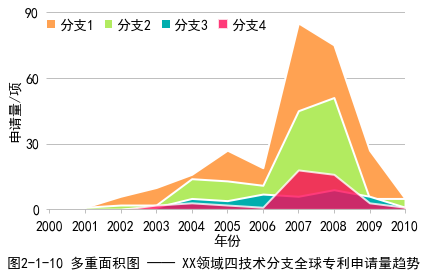

In [18]:
colors = ['#FFA252', '#B2EB60', '#00AEAE', '#FF0958']
xlim = [datetime(2000, 1, 1), datetime(2010, 1, 1)]
ylim = [0, 90]
yticks = range(0, 91, 30)

fig, ax = plt.subplots(tight_layout=True)

for col in range(1, 5):
    alpha = 0.8 if col == 4 else 1
    ax.fill_between(data_2110['年份'], data_2110.iloc[:,col], color=colors[col-1],
                    alpha=alpha, ec='w', lw=2, label=data_2110.columns[col])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_yticks(yticks)

ax.grid(True, axis='y')
grid_color = ax.get_ygridlines()[0].get_color()

ax.spines[['left', 'top', 'right']].set_visible(False)
ax.spines['bottom'].set_color(grid_color)

ax.set_xlabel('年份', fontsize=14)
ax.set_ylabel('申请量/项', fontsize=14)

ax.tick_params(color=grid_color, labelsize=14, pad=7)
ax.get_yaxis().set_zorder(0.5)

ax.legend(loc='upper left', ncol=4, fontsize=14, frameon=False, columnspacing=0.7,
        handlelength=0.7, handletextpad=0.2,
        bbox_to_anchor=(-0.045, 1.03), bbox_transform=ax.transAxes)

fig.supxlabel('图2-1-10 多重面积图 —— XX领域四技术分支全球专利申请量趋势', fontsize=14, y=0.05);

#### 堆积面积图
堆积面积图不仅能够展现多个数据系列随时间的变化趋势，还能够表达其数据总和。通常按照数据大小，由大到下自下而上进行堆叠，数据量最大、所占比最高、最重要的数据系列置于最下方。

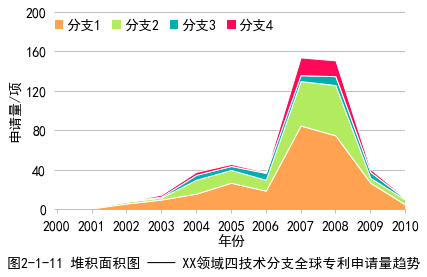

In [19]:
xlim = [datetime(2000, 1, 1), datetime(2010, 1, 1)]
ylim = [0, 200]
yticks = range(0, 201, 40)
colors = ['#FFA252', '#B2EB60', '#00AEAE', '#FF0958']

fig, ax = plt.subplots(tight_layout=True)
ax.stackplot(data_2110['年份'], np.transpose(data_2110.iloc[:,[1,2,3,4]]),
            colors=colors, ec='w', lw=1, labels=data_2110.columns[1:])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_yticks(yticks)

ax.grid(True, axis='y')
grid_color = ax.get_ygridlines()[0].get_color()

ax.spines[['left', 'top', 'right']].set_visible(False)
ax.spines['bottom'].set_color(grid_color)

ax.set_xlabel('年份', fontsize=14)
ax.set_ylabel('申请量/项', fontsize=14)

ax.tick_params(color=grid_color, labelsize=14, pad=7)
ax.get_yaxis().set_zorder(0.5)

ax.legend(loc='upper left', ncol=4, fontsize=14, frameon=False, columnspacing=0.7,
        handlelength=0.7, handletextpad=0.2,
        bbox_to_anchor=(-0.045, 1.03), bbox_transform=ax.transAxes)

fig.supxlabel('图2-1-11 堆积面积图 —— XX领域四技术分支全球专利申请量趋势', fontsize=14, y=0.05);

堆积面积图的另一个变形就是水流图（stream graph），它与堆积面积图以X轴为底部相比，使用了X轴呈对称的图形设计方式。

在专利分析中，可以用水流图来替代堆积面积图，展示某一技术领域各个技术分支、各个国家/地区或者各申请人的申请量年度变化情况。与堆积面积图相比，水流图能更清楚地表现出各分支单独的趋势变化，图形构成也更为流畅优雅。

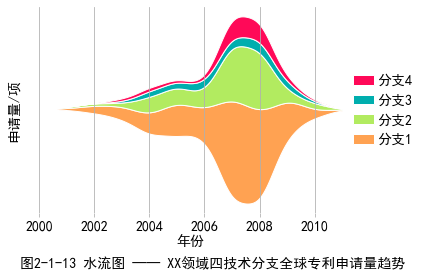

In [20]:
# 绘制方式参考https://python-graph-gallery.com/streamchart-basic-matplotlib
def gaussian_smooth(x, y, grid, sd):
    timestamp = x.dt.year
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in timestamp])
    weights = weights / weights.sum(0)
    return (weights * y).sum(1)

xticks = range(2000, 2011, 2)

fig, ax = plt.subplots(tight_layout=True)
grid = np.linspace(2000, 2011, num=500)
y_smoothed = [gaussian_smooth(data_2110['年份'], y_, grid, 0.55) for y_ in data_2110.iloc[:,[1,2,3,4]].values.T]
ax.stackplot(grid, y_smoothed, baseline='weighted_wiggle',
            colors=colors, ec='w', lw=1, labels=data_2110.columns[1:],
            )

ax.set_ylabel('申请量/项', fontsize=14)
ax.set_xlabel('年份', fontsize=14)

ax.grid(True, axis='x')
grid_color = ax.get_xgridlines()[0].get_color()

ax.set_xticks(xticks)
ax.set_yticks([])

ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)

ax.tick_params(color=grid_color, labelsize=14, left=False)

ax.legend(reversed(ax.legend().legendHandles), reversed(data_2110.columns),
        loc='right', frameon=False, fontsize=14, 
        handlelength=1.5, handletextpad=0.2,
        bbox_to_anchor=(1.2, 0.5), bbox_transform=ax.transAxes)

fig.supxlabel('图2-1-13 水流图 —— XX领域四技术分支全球专利申请量趋势', fontsize=14, y=0.05);

#### 百分比堆积面积图

百分比堆积面积图用于显示各项指标所占百分比随时间的变化趋势。在专利分析中，百分比堆积面积图常用于展示多个技术分支或多个国家/地区的专利申请相关数据随时间的变化。

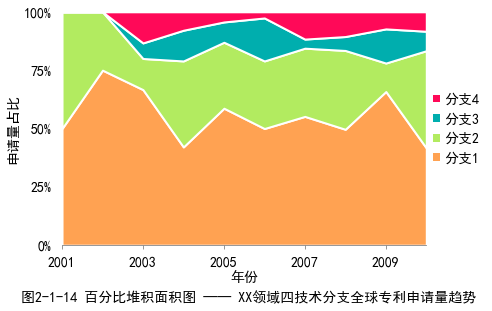

In [21]:
# 将原始数据转换成百分比数据
data_2110_ap = data_2110.iloc[:, 1:]
data_2110_perc = data_2110_ap.div(data_2110_ap.sum(1), axis=0)

colors = ['#FFA252', '#B2EB60', '#00AEAE', '#FF0958']
yticks = [0, 0.25, 0.5, 0.75, 1]
xticks = [datetime(y, 1, 1) for y in range(2001, 2010, 2)]

fig, ax = plt.subplots(figsize=(7, 4.5), tight_layout=True)
ax.stackplot(data_2110['年份'], np.transpose(data_2110_perc),
            colors=colors, ec='w', lw=2, labels=data_2110.columns[1:])

ax.margins(0, 0)
ax.spines[['top', 'left', 'right']].set_visible(False)
ax.spines['bottom'].set_color('grey')

ax.set_xticks(xticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.set_xlabel('年份', fontsize=14)
ax.set_ylabel('申请量占比', fontsize=14)

ax.set_yticks(yticks)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))

ax.tick_params(color='grey', labelsize=14, left=False, pad=7)

ax.legend(reversed(ax.legend().legendHandles), reversed(data_2110.columns),
        loc='right', frameon=False, fontsize=14, 
        handlelength=0.7, handletextpad=0.2,
        bbox_to_anchor=(1.18, 0.5), bbox_transform=ax.transAxes)

fig.supxlabel('图2-1-14 百分比堆积面积图 —— XX领域四技术分支全球专利申请量趋势', fontsize=14, y=0.05);

### 柱形图 —— 相对较短时间内单个时间点的申请数量

柱形图多用于显示一段时间内的数据变化或各项数据之间的比较情况。柱形图可分为以下三种：

* 单一柱形图
* 簇状柱形图
* 堆积柱形图

#### 单一柱形图

单一柱形图用于显示单一数据系列在一段时间内的变化情况

In [22]:
data_2115 = pd.read_csv('data/Fig2-1-15.csv', header=None,
                        parse_dates=[0]).rename(columns={0:'年份', 1:'申请量/项'})
data_2115.head()                        

,年份,申请量/项
0,1991-01-01,61
1,1992-01-01,44
2,1993-01-01,60
3,1994-01-01,105
4,1995-01-01,100


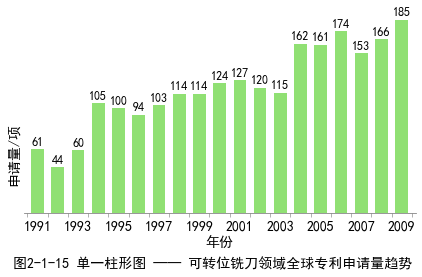

In [23]:
fill_color = '#90E073'
xticks = [dt.strftime('%Y') for (i, dt) in enumerate(data_2115['年份']) if i % 2 == 0]

fig, ax = plt.subplots(tight_layout=True)
ax.bar(data_2115['年份'], data_2115['申请量/项'], width=230, color=fill_color)

ax.set_xlabel(data_2115.columns[0], fontsize=14)
ax.set_ylabel(data_2115.columns[1], fontsize=14, y=0.3)

ax.spines[['top', 'left', 'right']].set_visible(False)
ax.spines['bottom'].set_color('grey')

ax.set_xticks(xticks)
ax.set_yticks([])

ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
# 将时间刻度标签显示在两个刻度线之间
ax.tick_params(left=False, color='grey', labelsize=14, bottom=False)    # 隐藏主刻度
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=7)) # 显示辅刻度
ax.tick_params(axis='x', which='minor', length=4, color='grey')

ax.margins(0.02, 0.02)

for row in range(len(data_2115)):
    ax.annotate(f'{data_2115.iloc[row, 1]}', xy=(data_2115.iloc[row, 0], data_2115.iloc[row, 1]),
                xytext=(0,2), textcoords='offset points', ha='center', va='bottom',
                fontsize=12)
# 柱状图的数值标注可以用Axes.bar_label

fig.supxlabel('图2-1-15 单一柱形图 —— 可转位铣刀领域全球专利申请量趋势', fontsize=14, y=0.05);

簇状柱形图显示多个数据系列在一段时间内的变化情况。

In [24]:
data_2116 = pd.read_csv('data/Fig2-1-16.csv', header=None,
                        parse_dates=[0]).rename(columns={0:'年份', 
                                                        1:'申请量（项）',
                                                        2:'申请人数量（位）'})
data_2116.head()                                                        

,年份,申请量（项）,申请人数量（位）
0,1991-01-01,62,37
1,1992-01-01,45,32
2,1993-01-01,62,39
3,1994-01-01,105,47
4,1995-01-01,100,50


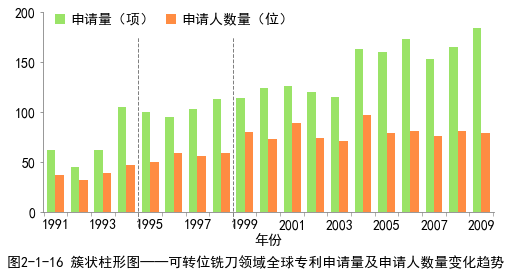

In [25]:
width = 130
ylim = [0, 200]
yticks = range(0, 201, 50)
xticks = [dt for (i, dt) in enumerate(data_2116['年份']) if i % 2 == 0]
colors = ['#9AE367', '#FF8C42']

fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True)
bar1 = ax.bar(data_2116['年份'], data_2116['申请量（项）'], width=-width, align='edge',
        label=data_2116.columns[1], color=colors[0])
bar2 = ax.bar(data_2116['年份'], data_2116['申请人数量（位）'], width=width, align='edge',
        label=data_2116.columns[2], color=colors[1])

ax.set_ylim(ylim)

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xlabel(data_2116.columns[0], fontsize=14)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color('grey')

# 使相应的数据标签在相邻两根刻度线中间显示
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=7))
ax.tick_params(which='major', bottom=False, labelsize=14, color='grey')
ax.tick_params(axis='x', which='minor', length=4, color='grey')

ax.margins(0.01, 0.01)

ax.legend(ncol=2, frameon=False, handlelength=0.7, handletextpad=0.4, fontsize=14,
        columnspacing=0.8, loc='upper left',
        bbox_to_anchor=(0, 1.06), bbox_transform=ax.transAxes)

ax.vlines([datetime(1994, 7, 1),datetime(1998, 7, 1)], -15, 175, 
        color='grey', linestyle='--', lw=1, clip_on=False)

fig.supxlabel('图2-1-16 簇状柱形图——可转位铣刀领域全球专利申请量及申请人数量变化趋势', 
                fontsize=14, y=0.05);

#### 堆积柱形图

堆积柱形图能够表现三方面的信息：

* 总量随时间的变化趋势
* 各个分支的数量随时间的变化趋势（事实上，除了最底层的分支，上层分支的数量随时间的变化趋势并不是那么显而易见，因为上层分支的各基准点不同）
* 在同一时间点中，即同一柱形中，每个分支所占的比例

In [26]:
data_2117 = pd.read_csv('data/Fig2-1-17.csv', header=None,
                        parse_dates=[0]).rename(columns={0:'年份',
                                                        1:'分支1',
                                                        2:'分支2',
                                                        3:'分支3'})
data_2117.head()                                                        

,年份,分支1,分支2,分支3
0,1994-01-01,1,2,1
1,1995-01-01,8,1,7
2,1996-01-01,0,3,0
3,1997-01-01,1,4,1
4,1998-01-01,0,5,0


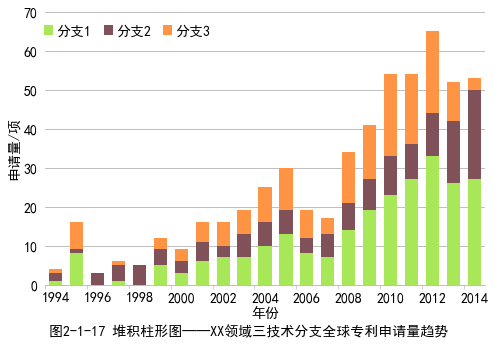

In [27]:
width = 230
ylim = [0, 70]
colors = ['#A8E758', '#805158', '#FF9445']
xticks = [dt for row, dt in enumerate(data_2117['年份']) if row % 2 == 0]

fig, ax = plt.subplots(figsize=(7,5), tight_layout=True)
pre_col = None
for (color, col) in zip(colors, data_2117.iloc[:,1:]):
    bottom = 0 if pre_col is None else data_2117[pre_col] + bottom  # 更新新分支柱形图的基底坐标
    ax.bar(data_2117['年份'], data_2117[col], width=width, label=col,
            bottom=bottom, color=color)
    pre_col = col

ax.set_ylabel('申请量/项', fontsize=14)
ax.set_xlabel(data_2117.columns[0], fontsize=14)

ax.set_ylim(ylim)

ax.set_xticks(xticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.grid(True, axis='y')
grid_color = ax.get_ygridlines()[0].get_color()
ax.get_yaxis().set_zorder(0.5)  # 将网格线设置在图形层下方

ax.spines[['top', 'left', 'right']].set_visible(False)
ax.spines['bottom'].set_color(grid_color)

# 使X轴标签显示在相邻两个刻度之间
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=7))
xticks_minor = [datetime(year, 7, 1) for year in range(1993, 2014, 2)]
ax.set_xticks(xticks_minor, minor=True) # 辅刻度每隔一个显示一个
ax.tick_params(which='minor', color=grid_color, length=4)

ax.tick_params(color=grid_color, labelsize=14, bottom=False, left=False)

ax.legend(loc='upper left', ncol=3, frameon=False, fontsize=14, 
        bbox_to_anchor=(-0.03,1), bbox_transform=ax.transAxes,
        handlelength=0.65, handletextpad=0.2, columnspacing=0.9)

ax.margins(0.01, 0.02)

fig.supxlabel('图2-1-17 堆积柱形图——XX领域三技术分支全球专利申请量趋势', fontsize=14, y=0.05);

## 技术构成分析

在专利分析中，通常需要对技术分解表中各技术分支的专利申请量进行统计分析，以了解专利技术的分布情况。在这种情况下，可以采用以下图形：

* 柱形图
* 条形图
* 饼图/环图
* 矩形树图
* 瀑布图

当需要比较不同对象（如不同国家或地区、不同申请人）的技术构成差异时，可以采用比较条形图和百分比堆积柱形图。

当进行数据标引时，有一部分专利同时涉及多个技术分支，此时会将这种专利既标引到技术分支1，又标引到技术分支2，也标引到技术分支3，如果要反映这种重复标引的专利数量的情况，可以尝试采用维恩图。

### 饼图/环图 —— 少量类别的百分比关系

饼图/环图通常用于表达6个以下类别之间百分比相对关系，其利用不同角度的扇区描述各项指标在总量中的占比。饼图/环图常见形式又可分为：

* 常规饼图/环图
* 多环图
* 半饼图/半环图

在专利分析中，可以采用饼图/环图来表示某一技术领域中各个技术分支的专利申请量占比，以此表现某一技术领域的专利技术构成。

In [28]:
data_221 = pd.read_csv('data/Fig2-2-1.csv', header=None).rename(columns={0:'技术分支',
                                                                         1:'申请量'})
data_221.head()

,技术分支,申请量
0,生产工艺,974
1,复合增强,338
2,其他,282
3,绝缘,254
4,过滤,82


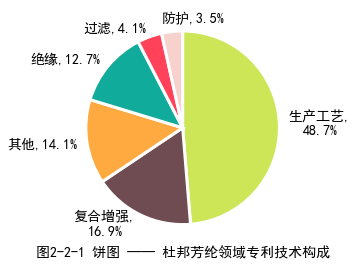

In [29]:
colors = ['#CDE657', '#6E4C51', '#FFAA40', '#10AB9A', '#FF415A', '#F7D1CB']

fig, ax = plt.subplots(tight_layout=True)
wedges, labels, pcts = ax.pie(data_221['申请量'], labels=data_221['技术分支'], colors=colors,
                        wedgeprops=dict(linewidth=3, edgecolor='w'), # 设置每个扇形的边缘
                        startangle=90, counterclock=False,
                        textprops=dict(fontsize=14),
                        autopct='%1.1f%%',
                        )
# 更改默认标签，使相应类别之后显示相应的百分比
for label, pct in zip(labels, pcts):
    old_label = label.get_text()
    old_pct = pct.get_text()
    sep = '\n' if len(old_label) > 2 else ''
    label.set_text(f'{old_label},{sep}{old_pct}')
    label.set_multialignment('center')
    # 去除自动生成的百分比
    pct.set_text('')

# 微调最后一个标签
labels[-1].set_horizontalalignment('left')
labels[-1].set_x(-0.22)
labels[-1].set_y(1.13)

fig.suptitle('图2-2-1 饼图 —— 杜邦芳纶领域专利技术构成', fontsize=14, y=0.05);

In [30]:
data_222 = pd.DataFrame({'申请人':['东丽','其他','三菱丽阳','东邦','Hexcel'],
                        '申请量':[62,54,38,38,8]})
data_222.head()

,申请人,申请量
0,东丽,62
1,其他,54
2,三菱丽阳,38
3,东邦,38
4,Hexcel,8


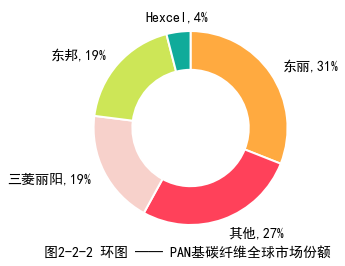

In [31]:
colors = ['#FFAA40','#FF415A','#F7D1CB','#CDE657','#10AB9A']

fig, ax = plt.subplots(tight_layout=True)

wedges, labels, pcts = ax.pie(data_222['申请量'], labels=data_222['申请人'], colors=colors,
                            startangle=90, counterclock=False,
                            autopct='%1.0f%%', labeldistance=1.15,
                            textprops={'fontsize':14},
                            wedgeprops={'lw':2, 'ec':'w', 'width':0.4} # 对edge的width属性进行配置以绘制环图
                            )

# 更改默认标签，使相应类别之后显示相应的百分比
for label, pct in zip(labels, pcts):
    old_label = label.get_text()
    old_pct = pct.get_text()
    label.set_text(f'{old_label},{old_pct}')
    label.set_multialignment('center')
    # 去除自动生成的百分比
    pct.set_text('')

# 微调最后一个标签
labels[-1].set_horizontalalignment('center')

fig.suptitle('图2-2-2 环图 —— PAN基碳纤维全球市场份额', fontsize=14, y=0.05);

In [69]:
data_223 = pd.read_csv('data/Fig2-2-3.csv')
data_223.head()

,一级,二级,三级,四级,申请量
0,应用与服务,云端,云点播,NaN,13
1,应用与服务,云端,云服务,NaN,13
2,应用与服务,云端,云应用,NaN,13
3,应用与服务,云端,云浏览,NaN,13
4,应用与服务,云端,云存储,NaN,13


Text(0, 0, 'Smart\nTV')

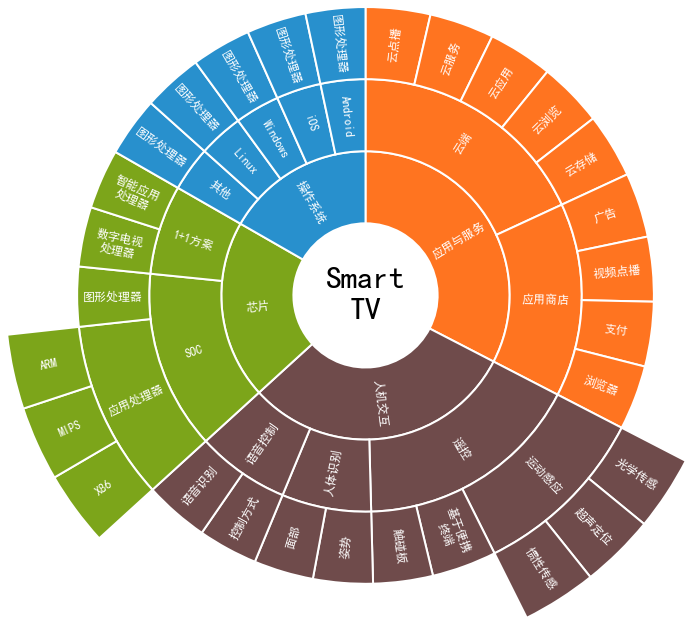

In [116]:
# 旋转标签
def rotate_label(wedges, labels):
    for wedge, label in zip(wedges, labels):
        ang = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
        r = wedge.r - width / 2
        x = r * np.cos(np.deg2rad(ang))
        y = r * np.sin(np.deg2rad(ang))
        label.set_x(x)
        label.set_y(y)
        rot_ang1 = ang % 180
        rot_ang2 = ang % (-180)
        # 保证只旋转最小的角度即可将标签转至方向一致
        rot_ang = rot_ang1 if np.abs(rot_ang1) < np.abs(rot_ang2) else rot_ang2
        label.set_rotation(rot_ang)

# 设置各子分支的颜色
def get_sub_colors(labels, main_colors, main_labels):
    color_dict = dict(zip(main_labels, main_colors))
    return [color_dict[label[0]] for label in labels]

data_rank_1 = data_223.groupby(by='一级', sort=False).sum()
data_rank_2 = data_223.groupby(by=['一级','二级'], sort=False).sum()
data_rank_3 = data_223.groupby(by=['一级', '二级','三级'], sort=False).sum()
data_rank_4 = data_223.groupby(by=['一级','二级','三级','四级'], sort=False, dropna=False).sum()

colors = ['#FF7420','#6F4B4B','#7CA51A','#2890CD']
width = 0.5

fig, ax = plt.subplots(figsize=(15,15),tight_layout=True)

kw = dict(
    startangle=90, counterclock=False,
    wedgeprops={'lw':2, 'ec':'w', 'width':width},
    textprops={'color':'w', 'ha':'center', 'fontweight':'bold', 'fontsize':12}
)

# 最内侧一级分支
wedges1, labels1 = ax.pie(
    data_rank_1['申请量'], labels=data_rank_1.index, colors=colors,
    **kw)

# 微调标签位置
rotate_label(wedges1, labels1)

# 二级分支
label2 = [label[1] for label in data_rank_2.index]
colors2 = get_sub_colors(data_rank_2.index, colors, data_rank_1.index)
wedges2, labels2 = ax.pie(
    data_rank_2['申请量'], labels=label2, colors=colors2, 
    radius=wedges1[0].r + width, **kw
)

rotate_label(wedges2, labels2)

# 三级分支
label3 = [label[2] if len(label[2]) <= 5 else f'{label[2][0:4]}\n{label[2][4:]}' 
            for label in data_rank_3.index]
colors3 = get_sub_colors(data_rank_3.index, colors, data_rank_1.index)
wedges3, labels3 = ax.pie(
    data_rank_3['申请量'], labels=label3, colors=colors3,
    radius=wedges2[0].r + width, **kw
)

rotate_label(wedges3, labels3)

# 四级分支
label4 = ['' if pd.isna(label[3]) else label[3] 
            for label in data_rank_4.index]     # 将四级分类为NaN的标签设置为空字符
colors4 = get_sub_colors(data_rank_4.index, colors, data_rank_1.index)
wedges4, labels4 = ax.pie(
    data_rank_4['申请量'], labels=label4, colors=colors4,
    radius=wedges3[0].r + width, **kw
)

rotate_label(wedges4, labels4)

# 将四级分类为NaN的扇形设置不可见
for wedge, label in zip(wedges4, label4):
    if label == '':
        wedge.set_visible(False)

ax.text(0, 0, 'Smart\nTV', ha='center', va='center', multialignment='center',
        fontsize=32)

In [102]:
pd.isna(label4[0])

True

In [65]:
d = dict(zip(data_rank_1.index, colors))

In [66]:
d['芯片']

'#7CA51A'